In [75]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import statsmodels as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
with open('data_processed/data_dict.pickle', 'rb') as handle:
    data = pickle.load(handle)
data_keys = list(data.keys())

In [88]:
df = data[data_keys[1]]
df.head()

,spool,diameter,speed,motorV,extfrq,target,temp
0,0.00,32.3,76.00,25.25,19.16,50.6,80.105
1,0.02,31.4,75.76,26.08,20.01,50.6,79.968
2,0.03,32.9,71.92,28.07,21.86,50.6,80.036
3,0.05,35.1,58.96,31.17,24.79,50.6,80.139
4,0.06,35.2,49.04,35.25,28.85,50.6,80.036


In [94]:
df = data[data_keys[1]]
df = df[['speed', 'extfrq', 'temp', 'diameter']]
means = df.mean()
stds = df.std()
df = (df-means)/stds
df.head()

,speed,extfrq,temp,diameter
0,-0.582828,-4.682112,0.686336,-2.263764
1,-0.600913,-4.623685,-0.010130,-2.391662
2,-0.890274,-4.496522,0.335561,-2.178499
3,-1.866866,-4.295124,0.859181,-1.865859
4,-2.614382,-4.016052,0.335561,-1.851648


Text(0, 0.5, 'Y')

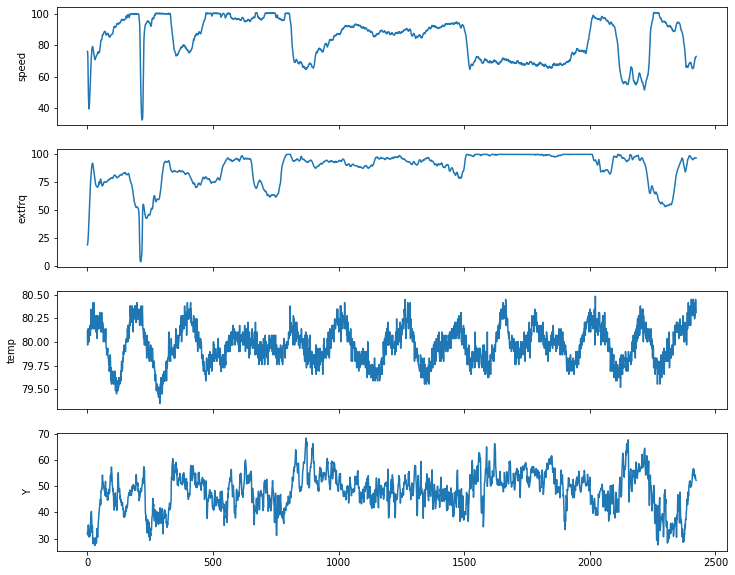

In [97]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, sharex=True, figsize=(12,10))
ax1.plot(df_x.speed)
ax1.set_ylabel('speed')
ax2.plot(df_x.extfrq)
ax2.set_ylabel('extfrq')
ax3.plot(df_x.temp)
ax3.set_ylabel('temp')
ax4.plot(y)
ax4.set_ylabel('Y')


In [110]:
model = SARIMAX(endog=y, exog=df_x, order=(2,2,2))
res = model.fit()
print(res.summary())

                           Statespace Model Results                           
Dep. Variable:               diameter   No. Observations:                 2424
Model:               SARIMAX(2, 2, 2)   Log Likelihood               -5527.592
Date:                Mon, 02 Dec 2019   AIC                          11071.185
Time:                        22:19:46   BIC                          11117.523
Sample:                             0   HQIC                         11088.035
                               - 2424                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
speed         -0.0324      0.059     -0.546      0.585      -0.149       0.084
extfrq         0.0465      0.076      0.613      0.540      -0.102       0.195
temp           0.4379      0.495      0.884      0.3

In [116]:
predict = res.get_prediction()
y_hat = predict.predicted_mean
predict_dyn = res.get_prediction(dynamic=200)
y_hat_dyn100 = predict_dyn.predicted_mean

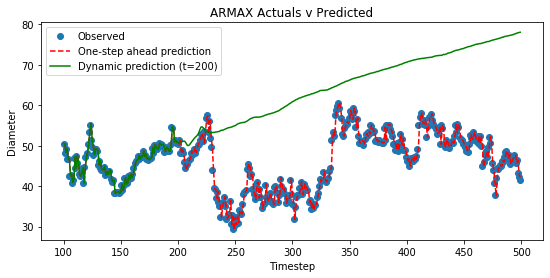

In [117]:
fig, ax = plt.subplots(figsize=(9,4))
ax.set(title='ARMAX Actuals v Predicted', xlabel='Timestep', ylabel='Diameter')
ax.plot(y[100:500], 'o', label='Observed')
ax.plot(y_hat[100:500], 'r--', label='One-step ahead prediction')
ax.plot(y_hat_dyn100[100:500], 'g', label='Dynamic prediction (t=200)')
ax.legend()

### References
- https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html#ARIMA-Example-4:-ARMAX-(Friedman)
- https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html
- https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/